# <center> Topic 4: Machine Learning
---
### Neural Networks and Keras 

Inputs and weights being applied to the inputs to a neuron:

![Neuron](https://1394217531-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LvBP1svpACTB1R1x_U4%2F-LvI8vNq_N7u3RWVAPLk%2F-LvJSdcFXzoI-WW0L3w5%2Fimage.png?alt=media&token=84526dc6-4634-4de5-aacf-00a179afac76)

Machine learning is a branch of artificial intelligence where systems learn from data, specifically the patterns that may be present and then make decisions based on what it has learned. With the massive amounts of data being collected worldwide on a daily basis, machine learning has become a popular tool to get insights from the data.

A Neural Network is a computing system that works the same way as neuron in a human brain. It has an input layer in which a weight and bias may be applied, hidden layers and an output layer. The layers are connected by nodes to form a neural network. Deeping learning is used on very large neural networks.

There are many types of neural network, some of the best example include - convolutional neural networks (CNN), recurrent neural networks (RNN), feedforward neural networks and autoencoder neural networks.
CNNs have five kinds of layers - input, convolution, pooling, fully connected and output. CNNs is used ina areas such as natural language processing and image classification.
RNNs use sequential information where the inputs are not independent of each other. Examples of usage include areas involving a time series and sentiment analysis.
In feedforward neural networks information is only fed in the forward direction, without feedback loops. 
Autencoder neural networks "are used to create abstractions called encoders, created from a given set of inputs." Autoencoders model inputs by themselves, which is considered unsupervised learning. "The premise of autoencoders is to desensitize the irrelevant and sensitize the relevant. As layers are added, further abstractions are formulated at higher layers (layers closest to the point at which a decoder layer is introduced). These abstractions can then be used by linear or nonlinear classifiers."(Neural networks - what are they and why do they matter? 2022)

In [41]:
# Importing the relevant Python packages:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [42]:
# Activation function to simple return it's input:
def identity(x):
    return x

In [15]:
# Firing a neuron.
def fire_neuron(x, w, phi):
    return phi(np.sum(x * w))

In [43]:
# Generating input values:
data_in = np.arange(1.0, 18.0, 0.5)
data_in

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5])

In [44]:
# Output values with some noise:
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, len(data_in))
data_out

array([ 3.08372918,  5.84563057,  7.44424128, 11.66548519, 12.18750415,
       13.51782712, 15.0520551 , 18.20669733, 19.5793477 , 21.63522373,
       23.27448691, 25.08533809, 29.63421531, 31.08809936, 32.38442378,
       34.56246525, 36.50452271, 38.58458509, 40.28408284, 42.59033628,
       42.89695489, 46.0977278 , 48.79059231, 50.17897418, 51.99466088,
       52.83492804, 55.65584502, 57.26724559, 59.79648026, 62.05608551,
       62.8312734 , 66.49631726, 70.15664201, 69.16934806])

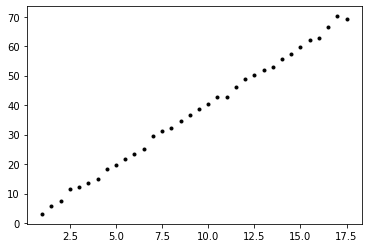

In [45]:
plt.plot(data_in, data_out, 'k.');

### Training:

In [12]:
# An index in the data set.
i = 5

In [13]:
# Actual input/output pair from the real world.
data_in[i], data_out[i]

(3.5, 12.833154191218243)

In [18]:
# Initial weights.
w =  np.array([0.0, 1.0])

# What the neuron currently outputs for the real-world input, based on current weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

3.5

In [19]:
# The goal is to create an algorithm that updates w to move the output towards the real output.
# Initial weights.
w =  np.array([0.0, 4.0])

# What the neuron could output for the real-world input, based on better weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

14.0

### Cost:

In [20]:
# Usually use sum of squares.
def cost(w, x, phi, y):
    pred = fire_neuron(x, w, phi)
    return (y - pred)**2

In [21]:
# An index in the data set.
i = 5

In [22]:
# Cost of initial w.
w = np.array([0.0, 1.0])

cost(w, data_in[i], identity, data_out[i])

87.10776715705467

In [23]:
# Cost of a "better" w.
w = np.array([0.0, 4.0])

cost(w, data_in[i], identity, data_out[i])

1.3615291414715516

### Training:

In [33]:
learningRate = 0.003

In [34]:
def train_neuron(x, y, w, phi):
    # The possible adjustment to the weights.
    adjust = np.array([0.0, learningRate])
    # Calculate the current cost.
    current = cost(w, x, phi, y)
    # Calculate the cost with slight adjustment to the weights.
    adding = cost(w + adjust, x, phi, y)
    # If the adjusted weights lower the cost, update the weights.
    if adding < current:
        w = w + adjust
    # Otherwise move in the other direction.
    else:
        w = w - adjust
    return w

In [35]:
# Initial weights.
w = np.array([0.0, 1.5])

In [36]:
# The training values.
data_in[i], data_out[i]

(3.5, 12.833154191218243)

In [37]:
# Current neuron output for data_in[i].
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

5.25

In [38]:
# Nudge the weights towards better values.
w_improved = train_neuron(data_in[i], data_out[i], w, identity)
w_improved

array([0.   , 1.503])

In [39]:
# Current neuron output for data_in[i].
fire_neuron(np.array([1.0, data_in[i]]), w_improved, identity)

5.2604999999999995

In [40]:
# Initial weights.
w = np.array([0.0, 1.0])

# Loop several times.
for epoch in range(10000):
    for i in range(len(data_in)):
        w = train_neuron(data_in[i], data_out[i], w, identity)

# Show w.
w

array([0., 4.])

### Using Keras:

In [47]:
# An instance of a sequential neural network:
model = keras.Sequential()

In [48]:
# A dense layer with 64 neurons and using the 'relu' activation function:
model.add(keras.layers.Dense(units=64, activation='relu'))

In [49]:
# Add a dense layer with 10 neurons and the softmax activation function.
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [50]:
# Compile the neural network.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [51]:
# Creating randomly-generated fake training data:
x_train = np.random.normal(0.0, 1.0, (100, 64))
y_train = np.random.normal(0.5, 0.1, (100, 10))

In [52]:
# Training the NN (Neural Network):
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
4/4 [==============================] - 0s 8ms/step - loss: 12.9618 - accuracy: 0.1300
Epoch 2/5
4/4 [==============================] - 0s 4ms/step - loss: 12.9064 - accuracy: 0.1200
Epoch 3/5
4/4 [==============================] - 0s 7ms/step - loss: 12.8603 - accuracy: 0.1100
Epoch 4/5
4/4 [==============================] - 0s 6ms/step - loss: 12.8100 - accuracy: 0.1100
Epoch 5/5
4/4 [==============================] - 0s 5ms/step - loss: 12.7840 - accuracy: 0.1000


In [53]:
# Testing data set:
x_test = np.random.normal(0.0, 1.0, (10, 64))
y_test = np.random.normal(0.5, 0.1, (10, 10))

In [54]:
# Evaluate the network.
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

1/1 [==============================] - 0s 3ms/step - loss: 12.7036 - accuracy: 0.2000


In [55]:
# Make predictions for the test set.
classes = model.predict(x_test, batch_size=128)

In [56]:
classes

array([[0.10020704, 0.05638981, 0.08322395, 0.27322033, 0.00997034,
        0.03149318, 0.15169029, 0.10630679, 0.14973961, 0.03775858],
       [0.07581504, 0.0840015 , 0.05432089, 0.0152621 , 0.1798372 ,
        0.17758158, 0.10249744, 0.16853872, 0.07366342, 0.068482  ],
       [0.06403724, 0.06784125, 0.12250909, 0.03062531, 0.10324669,
        0.05425259, 0.06328561, 0.17711446, 0.13413791, 0.18294989],
       [0.18217473, 0.11262271, 0.33963072, 0.07017399, 0.06423444,
        0.00521667, 0.02875043, 0.08515966, 0.03001801, 0.08201858],
       [0.06214234, 0.01856489, 0.05435864, 0.01794302, 0.5146814 ,
        0.0357458 , 0.06083452, 0.07775857, 0.12573342, 0.03223748],
       [0.02850509, 0.0577212 , 0.08554747, 0.01962261, 0.15657122,
        0.03949708, 0.02982462, 0.05244893, 0.5169417 , 0.01332003],
       [0.02209642, 0.24069753, 0.25033858, 0.07857837, 0.10267769,
        0.023412  , 0.04230884, 0.08758355, 0.02521443, 0.12709247],
       [0.16261739, 0.18669412, 0.1063085

### Single Neuron in Keras:

In [57]:
# New sequential neural network:
model = keras.Sequential()
# Adding a dense layer with 1 neuron and the identity activation function:
model.add(keras.layers.Dense(units=1))
# Compiling:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [78]:
data_in = np.arange(1.0, 11.0, 0.005)
data_in = data_in.reshape(-1, 1)
data_in

array([[ 1.   ],
       [ 1.005],
       [ 1.01 ],
       ...,
       [10.985],
       [10.99 ],
       [10.995]])

In [79]:
data_in.shape

(2000, 1)

In [80]:
data_out = 4.5 * data_in + np.random.normal(0.0, 1.0, data_in.shape)
data_out

array([[ 4.19944524],
       [ 4.93467658],
       [ 3.92820087],
       ...,
       [48.88874749],
       [49.02773224],
       [48.71618586]])

In [81]:
# Train the neural network.
model.fit(data_in, data_out, epochs=5, batch_size=32)

Epoch 1/5
63/63 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/5
63/63 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/5
63/63 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/5
63/63 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/5
63/63 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00


In [82]:
# Test input values.
data_test = np.linspace(-15.0, 30.0, 1501).reshape(-1, 1)

# Feed test values into neural network.
preds = model.predict(data_test)

In [83]:
data_test.flatten()[0]

-15.0

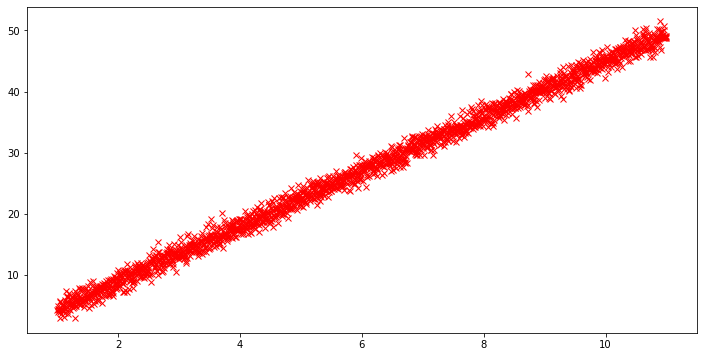

In [84]:
# Plot the values.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the original data set.
ax.plot(data_in.flatten(), data_out.flatten(), 'rx', label='Training')

# Plot the predicted data set.
ax.plot(data_test.flatten(), preds.flatten(), 'b.', label='Predictions');

### References:

Neural networks - what are they and why do they matter? (no date) Neural Networks - What are they and why do they matter? | SAS UK. Available at: https://www.sas.com/en_ie/insights/analytics/neural-networks.html (Accessed: December 1, 2022). 